In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Display all columns.
pd.set_option('display.max_columns', None)
#"Display all rows"
pd.set_option('display.max_rows', None)

# %matplotlib tk

# ### 
# np.set_printoptions(precision=3, suppress=True)
# pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Load data

In [3]:
data_train = pd.read_csv('./datas/train.csv')

In [4]:
data_test_a = pd.read_csv('./datas/testA.csv')

In [5]:
print(data_train.head())
print(data_train.shape)

   id  loanAmnt  term  interestRate  installment grade subGrade  \
0   0   35000.0     5         19.52       917.97     E       E2   
1   1   18000.0     5         18.49       461.90     D       D2   
2   2   12000.0     5         16.99       298.17     D       D3   
3   3   11000.0     3          7.26       340.96     A       A4   
4   4    3000.0     3         12.99       101.07     C       C2   

   employmentTitle employmentLength  homeOwnership  annualIncome  \
0            320.0          2 years              2      110000.0   
1         219843.0          5 years              0       46000.0   
2          31698.0          8 years              0       74000.0   
3          46854.0        10+ years              1      118000.0   
4             54.0              NaN              1       29000.0   

   verificationStatus   issueDate  isDefault  purpose  postCode  regionCode  \
0                   2  2014-07-01          1        1     137.0          32   
1                   2  2012-08

In [6]:
print(data_test_a.head())
print(data_test_a.shape)

       id  loanAmnt  term  interestRate  installment grade subGrade  \
0  800000   14000.0     3         10.99       458.28     B       B3   
1  800001   20000.0     5         14.65       472.14     C       C5   
2  800002   12000.0     3         19.99       445.91     D       D4   
3  800003   17500.0     5         14.31       410.02     C       C4   
4  800004   35000.0     3         17.09      1249.42     D       D1   

   employmentTitle employmentLength  homeOwnership  annualIncome  \
0           7027.0        10+ years              0       80000.0   
1          60426.0        10+ years              0       50000.0   
2          23547.0          2 years              1       60000.0   
3            636.0          4 years              0       37000.0   
4         368446.0         < 1 year              1       80000.0   

   verificationStatus   issueDate  purpose  postCode  regionCode    dti  \
0                   0  2014-07-01        0     163.0          21  10.56   
1             

In [7]:
print(data_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  800000 non-null  int64  
 1   loanAmnt            800000 non-null  float64
 2   term                800000 non-null  int64  
 3   interestRate        800000 non-null  float64
 4   installment         800000 non-null  float64
 5   grade               800000 non-null  object 
 6   subGrade            800000 non-null  object 
 7   employmentTitle     799999 non-null  float64
 8   employmentLength    753201 non-null  object 
 9   homeOwnership       800000 non-null  int64  
 10  annualIncome        800000 non-null  float64
 11  verificationStatus  800000 non-null  int64  
 12  issueDate           800000 non-null  object 
 13  isDefault           800000 non-null  int64  
 14  purpose             800000 non-null  int64  
 15  postCode            799999 non-nul

## View features


In [8]:
print(data_train.columns)

Index(['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'grade',
       'subGrade', 'employmentTitle', 'employmentLength', 'homeOwnership',
       'annualIncome', 'verificationStatus', 'issueDate', 'isDefault',
       'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years',
       'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec',
       'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc',
       'initialListStatus', 'applicationType', 'earliesCreditLine', 'title',
       'policyCode', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8',
       'n9', 'n10', 'n11', 'n12', 'n13', 'n14'],
      dtype='object')


In [9]:
print(data_test_a.columns)

Index(['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'grade',
       'subGrade', 'employmentTitle', 'employmentLength', 'homeOwnership',
       'annualIncome', 'verificationStatus', 'issueDate', 'purpose',
       'postCode', 'regionCode', 'dti', 'delinquency_2years', 'ficoRangeLow',
       'ficoRangeHigh', 'openAcc', 'pubRec', 'pubRecBankruptcies', 'revolBal',
       'revolUtil', 'totalAcc', 'initialListStatus', 'applicationType',
       'earliesCreditLine', 'title', 'policyCode', 'n0', 'n1', 'n2', 'n3',
       'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14'],
      dtype='object')


In [10]:
print(set(data_train.columns.tolist())-set(data_test_a.columns.tolist()))

{'isDefault'}


## View label
-- isDefault

In [11]:
data_train['isDefault'].value_counts()

isDefault
0    640390
1    159610
Name: count, dtype: int64

In [12]:
# "Merge train and test."
train_datas_Y = data_train[['isDefault']]
print(train_datas_Y['isDefault'].value_counts())
train_datas_X = data_train.drop(['isDefault'],axis=1)
# print(train_datas_X.head())
print(train_datas_X.shape)

isDefault
0    640390
1    159610
Name: count, dtype: int64
(800000, 46)


In [13]:
all_datas = pd.concat(([train_datas_X,data_test_a]),axis=0,ignore_index=True)
print(all_datas.shape)

(1000000, 46)


## A rough overview of the basic statistical measures for each feature in the dataset.
-- describe() 


In [14]:
all_datas.describe()

,id,loanAmnt,term,interestRate,installment,employmentTitle,homeOwnership,annualIncome,verificationStatus,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,999999.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,999999.000000,1000000.000000,999700.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,999479.000000,1.000000e+06,999342.000000,1000000.000000,1000000.000000,1000000.000000,999999.000000,1000000.0,949619.000000,949619.000000,949619.000000,949619.000000,958367.000000,949619.000000,949619.000000,949619.000000,949618.000000,949619.000000,958367.000000,912673.000000,949619.000000,949619.000000,949619.000000
mean,499999.500000,14420.845925,3.482534,13.239673,438.105739,72091.431605,0.614190,7.619750e+04,1.009832,1.745668,258.480425,16.394772,18.285902,0.317770,696.196545,700.196687,11.594484,0.215038,0.134389,1.623413e+04,51.807612,24.983451,0.416892,0.019307,1758.926990,1.0,0.511119,3.643485,5.643547,5.643547,4.735022,8.105145,8.566264,8.281331,14.616502,5.593135,11.640496,0.000818,0.003431,0.089161,2.178948
std,288675.278933,8720.358533,0.855704,4.765909,261.617903,106647.143239,0.675692,7.077646e+04,0.782519,2.367460,199.980363,11.041613,11.219721,0.879524,31.863308,31.863973,5.471342,0.606479,0.378112,2.245257e+04,24.524087,11.988140,0.493045,0.137602,7949.848213,0.0,1.329637,2.249020,3.303965,3.303965,2.951852,4.800121,7.381178,4.559533,8.121567,3.217142,5.480215,0.030164,0.062495,0.508290,1.843899
min,0.000000,500.000000,3.000000,5.310000,14.010000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,625.000000,629.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,249999.750000,8000.000000,3.000000,9.750000,248.480000,427.000000,0.000000,4.567103e+04,0.000000,0.000000,103.000000,8.000000,11.800000,0.000000,670.000000,674.000000,8.000000,0.000000,0.000000,5.943000e+03,33.400000,16.000000,0.000000,0.000000,0.000000,1.0,0.000000,2.000000,3.000000,3.000000,3.000000,5.000000,4.000000,5.000000,9.000000,3.000000,8.000000,0.000000,0.000000,0.000000,1.000000
50%,499999.500000,12000.000000,3.000000,12.740000,375.380000,7782.000000,1.000000,6.500000e+04,1.000000,0.000000,203.000000,14.000000,17.620000,0.000000,690.000000,694.000000,11.000000,0.000000,0.000000,1.113300e+04,52.200000,23.000000,0.000000,0.000000,1.000000,1.0,0.000000,3.000000,5.000000,5.000000,4.000000,7.000000,7.000000,7.000000,13.000000,5.000000,11.000000,0.000000,0.000000,0.000000,2.000000
75%,749999.250000,20000.000000,3.000000,15.990000,580.730000,118112.000000,1.000000,9.000000e+04,2.000000,4.000000,394.000000,22.000000,24.060000,0.000000,710.000000,714.000000,14.000000,0.000000,0.000000,1.974300e+04,70.700000,32.000000,1.000000,0.000000,5.000000,1.0,0.000000,5.000000,7.000000,7.000000,6.000000,11.000000,11.000000,10.000000,19.000000,7.000000,14.000000,0.000000,0.000000,0.000000,3.000000
max,999999.000000,40000.000000,5.000000,30.990000,1715.420000,378351.000000,5.000000,1.099920e+07,2.000000,13.000000,940.000000,50.000000,999.000000,39.000000,845.000000,850.000000,90.000000,86.000000,12.000000,2.904836e+06,892.300000,162.000000,1.000000,1.000000,61680.000000,1.0,51.000000,33.000000,63.000000,63.000000,63.000000,70.000000,132.000000,83.000000,128.000000,45.000000,90.000000,4.000000,4.000000,39.000000,30.000000


## View missing values, unique values, and other features in the dataset.

In [15]:
print(all_datas.isnull().sum())  # 每列缺失值数量

id                        0
loanAmnt                  0
term                      0
interestRate              0
installment               0
grade                     0
subGrade                  0
employmentTitle           1
employmentLength      58541
homeOwnership             0
annualIncome              0
verificationStatus        0
issueDate                 0
purpose                   0
postCode                  1
regionCode                0
dti                     300
delinquency_2years        0
ficoRangeLow              0
ficoRangeHigh             0
openAcc                   0
pubRec                    0
pubRecBankruptcies      521
revolBal                  0
revolUtil               658
totalAcc                  0
initialListStatus         0
applicationType           0
earliesCreditLine         0
title                     1
policyCode                0
n0                    50381
n1                    50381
n2                    50381
n3                    50381
n4                  

## Specifically view missing features and missing rates


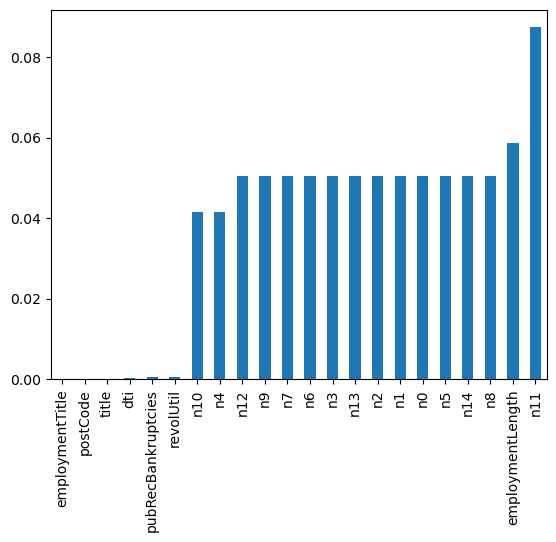

In [16]:
# nan
missing = all_datas.isnull().sum()/len(all_datas)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()
plt.show()

## Filling missing values

In [17]:
all_datas[missing.keys()].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   employmentTitle     999999 non-null  float64
 1   postCode            999999 non-null  float64
 2   title               999999 non-null  float64
 3   dti                 999700 non-null  float64
 4   pubRecBankruptcies  999479 non-null  float64
 5   revolUtil           999342 non-null  float64
 6   n10                 958367 non-null  float64
 7   n4                  958367 non-null  float64
 8   n12                 949619 non-null  float64
 9   n9                  949619 non-null  float64
 10  n7                  949619 non-null  float64
 11  n6                  949619 non-null  float64
 12  n3                  949619 non-null  float64
 13  n13                 949619 non-null  float64
 14  n2                  949619 non-null  float64
 15  n1                  949619 non-nu

In [18]:

all_datas["employmentLength"].value_counts(dropna=False)

employmentLength
10+ years    328525
2 years       90565
< 1 year      80226
3 years       80163
1 year        65671
5 years       62645
4 years       59818
NaN           58541
6 years       46582
8 years       45168
7 years       44230
9 years       37866
Name: count, dtype: int64

In [19]:
[i for i in  all_datas["employmentLength"].value_counts().keys()]

['10+ years',
 '2 years',
 '< 1 year',
 '3 years',
 '1 year',
 '5 years',
 '4 years',
 '6 years',
 '8 years',
 '7 years',
 '9 years']

In [20]:
# 10+ years--> 11 years
# < 1 year--> 1 years
all_datas["employmentLength"].fillna(-1,inplace=True)
for i in all_datas["employmentLength"].value_counts().keys():
    if i == "10+ years":
        value = 11 
    elif i == "< 1 year":
        value = 1
    elif i == -1:
        value = 0
#         continue
    else:
        value = int(i.split(" ")[0]) + 1
    all_datas["employmentLength"].replace(to_replace=i,value=value,inplace=True)
# all_datas["employmentLength"].replace(to_replace="10+ years",value="10 years",inplace=True)
# all_datas["employmentLength"].replace(to_replace="< 1 year",value="0 years",inplace=True)
# all_datas["employmentLength"].fillna(-1,inplace=True)
all_datas["employmentLength"].value_counts(dropna=False)

employmentLength
11    328525
3      90565
1      80226
4      80163
2      65671
6      62645
5      59818
0      58541
7      46582
9      45168
8      44230
10     37866
Name: count, dtype: int64

In [21]:
all_datas[missing.keys()].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 22 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   employmentTitle     999999 non-null   float64
 1   postCode            999999 non-null   float64
 2   title               999999 non-null   float64
 3   dti                 999700 non-null   float64
 4   pubRecBankruptcies  999479 non-null   float64
 5   revolUtil           999342 non-null   float64
 6   n10                 958367 non-null   float64
 7   n4                  958367 non-null   float64
 8   n12                 949619 non-null   float64
 9   n9                  949619 non-null   float64
 10  n7                  949619 non-null   float64
 11  n6                  949619 non-null   float64
 12  n3                  949619 non-null   float64
 13  n13                 949619 non-null   float64
 14  n2                  949619 non-null   float64
 15  n1              

In [22]:
nan_num = all_datas.isnull().sum()
# print(all_datas.isnull().sum())
missing_columns = list(nan_num[nan_num>0].index)
missing_columns

['employmentTitle',
 'postCode',
 'dti',
 'pubRecBankruptcies',
 'revolUtil',
 'title',
 'n0',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n11',
 'n12',
 'n13',
 'n14']

In [23]:
df_missing = all_datas[missing_columns]
df_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   employmentTitle     999999 non-null  float64
 1   postCode            999999 non-null  float64
 2   dti                 999700 non-null  float64
 3   pubRecBankruptcies  999479 non-null  float64
 4   revolUtil           999342 non-null  float64
 5   title               999999 non-null  float64
 6   n0                  949619 non-null  float64
 7   n1                  949619 non-null  float64
 8   n2                  949619 non-null  float64
 9   n3                  949619 non-null  float64
 10  n4                  958367 non-null  float64
 11  n5                  949619 non-null  float64
 12  n6                  949619 non-null  float64
 13  n7                  949619 non-null  float64
 14  n8                  949618 non-null  float64
 15  n9                  949619 non-nu

In [50]:
# View value count
for column_name in missing_columns:
    print("=============={}========================".format(column_name))
    column_count = all_datas[column_name].value_counts(dropna=False).shape[0]
    print(column_count)
    if column_count < 120:
        print('the shape is', all_datas[column_name].value_counts(dropna=False).shape)
        print(all_datas[column_name].value_counts(dropna=False))
    


==============employmentTitle========================
298101
==============postCode========================
935
==============dti========================
6609
==============pubRecBankruptcies========================
12
the shape is (12,)
pubRecBankruptcies
0.0     875415
1.0     117223
2.0       5726
3.0       1173
4.0        298
5.0        105
6.0         35
7.0         12
8.0          8
9.0          3
12.0         1
11.0         1
Name: count, dtype: int64
==============revolUtil========================
1327
==============title========================
47903
==============n0========================
39
the shape is (39,)
n0
0.0     774788
1.0     120132
2.0      48336
3.0      22050
4.0      13177
5.0       7751
6.0       4838
7.0       3084
8.0       1912
9.0       1251
10.0       855
11.0       510
12.0       409
13.0       236
14.0       210
15.0       101
16.0        87
17.0        61
18.0        47
19.0        26
23.0        20
20.0        18
21.0        18
22.0        16
24.0    

In [25]:
# all_datas["employmentTitle"].fillna(all_datas["employmentTitle"].mode(),inplace=True)
# all_datas[missing_columns].isnull().sum()

In [26]:
# all_datas[missing_columns] = all_datas[missing_columns].fillna(all_datas[missing_columns].mode())
# from sklearn.preprocessing import Imputer
# imp = Imputer(strategy='most_frequent')
# all_datas[missing_columns] = imp.fit_transform(all_datas[missing_columns])

# imputer
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='most_frequent')
all_datas[missing_columns] = imp.fit_transform(all_datas[missing_columns])

In [27]:
all_datas[missing_columns].isnull().sum()

employmentTitle       0
postCode              0
dti                   0
pubRecBankruptcies    0
revolUtil             0
title                 0
n0                    0
n1                    0
n2                    0
n3                    0
n4                    0
n5                    0
n6                    0
n7                    0
n8                    0
n9                    0
n10                   0
n11                   0
n12                   0
n13                   0
n14                   0
dtype: int64

In [28]:
all_datas.isnull().sum()

id                    0
loanAmnt              0
term                  0
interestRate          0
installment           0
grade                 0
subGrade              0
employmentTitle       0
employmentLength      0
homeOwnership         0
annualIncome          0
verificationStatus    0
issueDate             0
purpose               0
postCode              0
regionCode            0
dti                   0
delinquency_2years    0
ficoRangeLow          0
ficoRangeHigh         0
openAcc               0
pubRec                0
pubRecBankruptcies    0
revolBal              0
revolUtil             0
totalAcc              0
initialListStatus     0
applicationType       0
earliesCreditLine     0
title                 0
policyCode            0
n0                    0
n1                    0
n2                    0
n3                    0
n4                    0
n5                    0
n6                    0
n7                    0
n8                    0
n9                    0
n10             

## Look for constant features

In [30]:
one_value_fea = [col for col in data_train.columns if data_train[col].nunique() <= 1]
one_value_fea

['policyCode']

In [31]:
one_value_fea_test = [col for col in data_test_a.columns if data_test_a[col].nunique() <= 1]
one_value_fea_test

['policyCode']

In [32]:
# delete it
all_datas.drop(["policyCode"],axis=1)
all_datas.shape


(1000000, 46)

In [33]:
all_datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 46 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1000000 non-null  int64  
 1   loanAmnt            1000000 non-null  float64
 2   term                1000000 non-null  int64  
 3   interestRate        1000000 non-null  float64
 4   installment         1000000 non-null  float64
 5   grade               1000000 non-null  object 
 6   subGrade            1000000 non-null  object 
 7   employmentTitle     1000000 non-null  float64
 8   employmentLength    1000000 non-null  int64  
 9   homeOwnership       1000000 non-null  int64  
 10  annualIncome        1000000 non-null  float64
 11  verificationStatus  1000000 non-null  int64  
 12  issueDate           1000000 non-null  object 
 13  purpose             1000000 non-null  int64  
 14  postCode            1000000 non-null  float64
 15  regionCode      

In [34]:
# select_dtypes(include=None, exclude=None)
numerical_fea = list(all_datas.select_dtypes(exclude=['object']).columns)
numerical_fea

['id',
 'loanAmnt',
 'term',
 'interestRate',
 'installment',
 'employmentTitle',
 'employmentLength',
 'homeOwnership',
 'annualIncome',
 'verificationStatus',
 'purpose',
 'postCode',
 'regionCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'pubRecBankruptcies',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'initialListStatus',
 'applicationType',
 'title',
 'policyCode',
 'n0',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n11',
 'n12',
 'n13',
 'n14']

In [35]:
# object类型的
category_fea = list(filter(lambda x: x not in numerical_fea,list(all_datas.columns)))
category_fea

['grade', 'subGrade', 'issueDate', 'earliesCreditLine']

## Analyse categorical features


In [36]:
for column_name in category_fea:
    print("=============={}========================".format(column_name))
    print(data_train[column_name].value_counts(dropna=False))

==============grade========================
grade
B    233690
C    227118
A    139661
D    119453
E     55661
F     19053
G      5364
Name: count, dtype: int64
==============subGrade========================
subGrade
C1    50763
B4    49516
B5    48965
B3    48600
C2    47068
C3    44751
C4    44272
B2    44227
B1    42382
C5    40264
A5    38045
A4    30928
D1    30538
D2    26528
A1    25909
D3    23410
A3    22655
A2    22124
D4    21139
D5    17838
E1    14064
E2    12746
E3    10925
E4     9273
E5     8653
F1     5925
F2     4340
F3     3577
F4     2859
F5     2352
G1     1759
G2     1231
G3      978
G4      751
G5      645
Name: count, dtype: int64
==============issueDate========================
issueDate
2016-03-01    29066
2015-10-01    25525
2015-07-01    24496
2015-12-01    23245
2014-10-01    21461
2016-02-01    20571
2015-11-01    19453
2015-01-01    19254
2015-04-01    18929
2015-08-01    18750
2015-05-01    17119
2016-01-01    16792
2014-07-01    16355
2015-06-01    15236


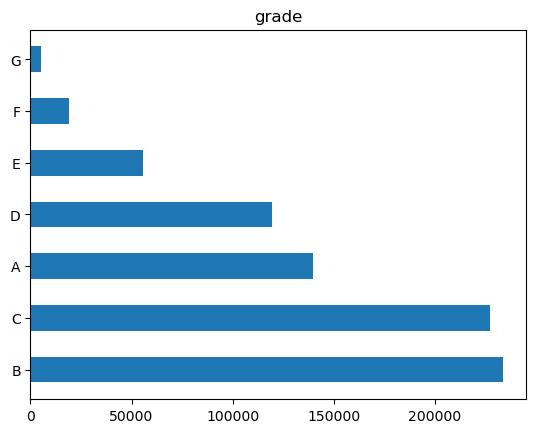

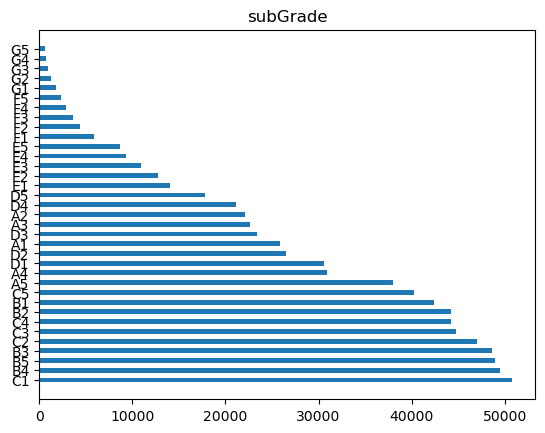

In [37]:
# 'grade', 'subGrade' plot
for column_name in ['grade', 'subGrade']:
#     plt.figure(column_name)
#     plt.figure(figsize=(8,6))
    plt.barh([str(i) for i in data_train[column_name].value_counts(dropna=False).keys()],
             data_train[column_name].value_counts(dropna=False),
             height=0.5
            )
    plt.title(column_name)
    plt.show()

In [38]:
grade_names = sorted(data_train['grade'].value_counts(dropna=False).keys().tolist())
grade_names


['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [39]:
grade_map_dict = {i:index+1 for index,i in enumerate(grade_names)}
grade_map_dict

{'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}

In [40]:
subGrade_names = sorted(data_train['subGrade'].value_counts(dropna=False).keys().tolist())
subGrade_names

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

In [41]:
subGrade_map_dict = {i:index+1 for index,i in enumerate(subGrade_names)}
subGrade_map_dict

{'A1': 1,
 'A2': 2,
 'A3': 3,
 'A4': 4,
 'A5': 5,
 'B1': 6,
 'B2': 7,
 'B3': 8,
 'B4': 9,
 'B5': 10,
 'C1': 11,
 'C2': 12,
 'C3': 13,
 'C4': 14,
 'C5': 15,
 'D1': 16,
 'D2': 17,
 'D3': 18,
 'D4': 19,
 'D5': 20,
 'E1': 21,
 'E2': 22,
 'E3': 23,
 'E4': 24,
 'E5': 25,
 'F1': 26,
 'F2': 27,
 'F3': 28,
 'F4': 29,
 'F5': 30,
 'G1': 31,
 'G2': 32,
 'G3': 33,
 'G4': 34,
 'G5': 35}

In [42]:
all_datas['grade'] = all_datas['grade'].map(grade_map_dict)
all_datas['subGrade'] = all_datas['subGrade'].map(subGrade_map_dict)

In [43]:
all_datas[['grade','subGrade']].head()

,grade,subGrade
0,5,22
1,4,17
2,4,18
3,1,4
4,3,12


In [44]:
all_datas[['issueDate', 'earliesCreditLine','term']].head()

,issueDate,earliesCreditLine,term
0,2014-07-01,Aug-2001,5
1,2012-08-01,May-2002,5
2,2015-10-01,May-2006,5
3,2015-08-01,May-1999,3
4,2016-03-01,Aug-1977,3


In [45]:
all_datas.drop(['issueDate', 'earliesCreditLine'],axis=1,inplace=True)
all_datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 44 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1000000 non-null  int64  
 1   loanAmnt            1000000 non-null  float64
 2   term                1000000 non-null  int64  
 3   interestRate        1000000 non-null  float64
 4   installment         1000000 non-null  float64
 5   grade               1000000 non-null  int64  
 6   subGrade            1000000 non-null  int64  
 7   employmentTitle     1000000 non-null  float64
 8   employmentLength    1000000 non-null  int64  
 9   homeOwnership       1000000 non-null  int64  
 10  annualIncome        1000000 non-null  float64
 11  verificationStatus  1000000 non-null  int64  
 12  purpose             1000000 non-null  int64  
 13  postCode            1000000 non-null  float64
 14  regionCode          1000000 non-null  int64  
 15  dti             

In [46]:
train_process_datas_x = all_datas.iloc[:train_datas_X.shape[0],:]
test_process_datas = all_datas.iloc[train_datas_X.shape[0]:,:]
print(train_process_datas_x.shape)
print(test_process_datas.shape)

(800000, 44)
(200000, 44)


In [47]:
### save
dir_path = './processs_datas'
import os
if os.path.exists(dir_path):
    pass
else:
    os.makedirs(dir_path)


train_process_datas_x.to_csv(dir_path+'/train_process_datas_x.csv',index=False)
test_process_datas.to_csv(dir_path+'/test_process_datas.csv',index=False)
train_datas_Y.to_csv(dir_path+'/train_datas_Y.csv',index=False)

In [48]:
print(train_datas_Y['isDefault'].value_counts())

isDefault
0    640390
1    159610
Name: count, dtype: int64


In [49]:
import pandas as pd
X = pd.read_csv("./processs_datas/train_process_datas_x.csv")
Y = pd.read_csv("./processs_datas/train_datas_Y.csv")